In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# matplotlob params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

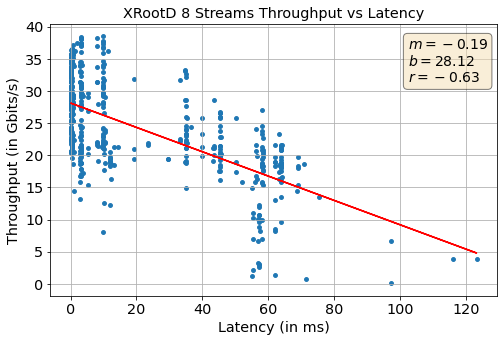

In [3]:
with open('xrootd-8-dataPoints.txt','rb') as f2:
    xrootd_data = pickle.load(f2)
xrootd_dataArray = np.array(xrootd_data)
xrootd_x = xrootd_dataArray[:,0]
xrootd_y = xrootd_dataArray[:,1]

xrootd_m, xrootd_b, xrootd_r, xrootd_p, xrootd_stderr = stats.linregress(xrootd_x, xrootd_y)

fig, ax = plt.subplots()
textstr = '\n'.join((
rf'$m = {round(xrootd_m,2)}$',
rf'$b = {round(xrootd_b,2)}$',
rf'$r = {round(xrootd_r,2)}$'))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.8, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax.set_title('XRootD 8 Streams Throughput vs Latency')
ax.set_xlabel('Latency (in ms)')
ax.set_ylabel('Throughput (in Gbits/s)')
ax.grid(True, which='both')
ax.scatter(xrootd_x,xrootd_y,s=15)
ax.plot(xrootd_x, xrootd_m*xrootd_x+xrootd_b,color='red')

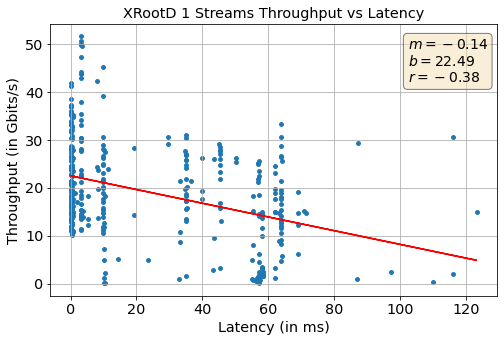

In [6]:
with open('dataPoints/xrootd-1-datapoints.txt','rb') as f3:
    xrootds_data = pickle.load(f3)
xrootds_dataArray = np.array(xrootds_data)
xrootds_x = xrootds_dataArray[:,0]
xrootds_y = xrootds_dataArray[:,1]

xrootds_m, xrootds_b, xrootds_r, xrootds_p, xrootds_stderr = stats.linregress(xrootds_x, xrootds_y)

fig, ax = plt.subplots()
textstr = '\n'.join((
rf'$m = {round(xrootds_m,2)}$',
rf'$b = {round(xrootds_b,2)}$',
rf'$r = {round(xrootds_r,2)}$'))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.8, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax.set_title('XRootD 1 Streams Throughput vs Latency')
ax.set_xlabel('Latency (in ms)')
ax.set_ylabel('Throughput (in Gbits/s)')
ax.grid(True, which='both')
ax.scatter(xrootds_x,xrootds_y,s=15)
ax.plot(xrootds_x, xrootds_m*xrootds_x+xrootds_b,color='red')

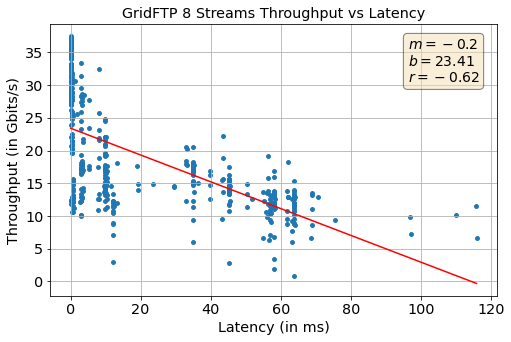

In [9]:
with open('./gridftp-8-dataPoints.txt','rb') as f1:
    gftp_data = pickle.load(f1)
gftp_dataArray = np.array(gftp_data)
gftp_dataArray = gftp_dataArray[gftp_dataArray[:,0].argsort()]
gftp_x = gftp_dataArray[:,0][(gftp_dataArray[:,1] > 10) | (gftp_dataArray[:,0] > 10)]
gftp_y = gftp_dataArray[:,1][(gftp_dataArray[:,1] > 10) | (gftp_dataArray[:,0] > 10)]

gftp_m, gftp_b, gftp_r, gftp_p, gftp_stderr = stats.linregress(gftp_x, gftp_y)

fig, ax = plt.subplots()
textstr = '\n'.join((
rf'$m = {round(gftp_m,2)}$',
rf'$b = {round(gftp_b,2)}$',
rf'$r = {round(gftp_r,2)}$'))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.8, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax.set_title('GridFTP 8 Streams Throughput vs Latency')
ax.set_xlabel('Latency (in ms)')
ax.set_ylabel('Throughput (in Gbits/s)')
ax.grid(True, which='both')
ax.scatter(gftp_x,gftp_y,s=15)
ax.plot(gftp_x, gftp_m*gftp_x+gftp_b,color='red')

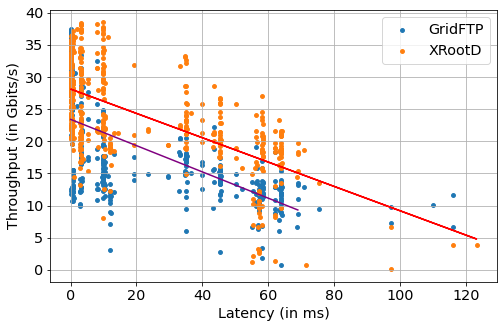

In [10]:
fig, ax = plt.subplots()
ax.set_xlabel('Latency (in ms)')
ax.set_ylabel('Throughput (in Gbits/s)')
ax.grid(True, which='both')
ax.scatter(gftp_x,gftp_y,s=15,label='GridFTP')
ax.plot(gftp_x[0:-10], gftp_m*gftp_x[0:-10]+gftp_b,color='purple')
ax.scatter(xrootd_x,xrootd_y,s=15,label='XRootD')
ax.plot(xrootd_x, xrootd_m*xrootd_x+xrootd_b,color='red')
ax.legend()